In [65]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [66]:
city_data = pd.read_csv("raw_data/city_data.csv")
ride_data = pd.read_csv("raw_data/ride_data.csv")

ride_data.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


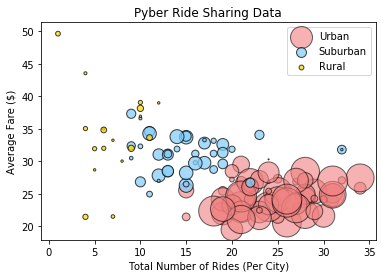

In [164]:
grouped_rides = ride_data.groupby("city")
rides_per_city = grouped_rides["ride_id"].count()
average_fare = grouped_rides["fare"].mean()

df = pd.DataFrame({"Number of Riders": rides_per_city,
                  "Average Fare": average_fare})
df = df.reset_index()
df

merge = pd.merge(df, city_data, on="city")

urban = merge.loc[merge["type"] == "Urban"]
suburban = merge.loc[merge["type"] == "Suburban"]
rural = merge.loc[merge["type"] == "Rural"]

urban = plt.scatter(urban["Number of Riders"].values, urban["Average Fare"].values, s=urban["driver_count"].values**1.6, marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.60, label="Urban")
suburban = plt.scatter(suburban["Number of Riders"].values, suburban["Average Fare"].values, s=suburban["driver_count"].values**1.6, marker="o", facecolors="LightSkyBlue", edgecolors="black", alpha=0.75, label="Suburban")
rural = plt.scatter(rural["Number of Riders"].values, rural["Average Fare"].values, s=rural["driver_count"].values**1.6, marker="o", facecolors="Gold", edgecolors="black", alpha=0.75, label="Rural")

plt.legend(handles=[urban, suburban, rural], loc="best")
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

urban

In [82]:
merged = pd.merge(ride_data, city_data, on="city", how="left")
merged

city_data

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban
5,South Josephville,4,Urban
6,West Sydneyhaven,70,Urban
7,Travisville,37,Urban
8,Torresshire,70,Urban
9,Lisaville,66,Urban


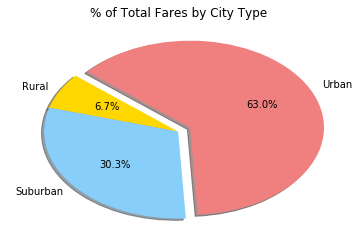

In [125]:
#Create a pie chart - % of total fares by city type


#Get the sum of the fares of the 'grouped by city' data
total_fares = grouped_rides["fare"].sum()

#Store the total fares by city into a dataframe and reset index to prep for a merge with city data
total_fares_city_df = pd.DataFrame({"Total Fares": total_fares}).reset_index()

#Merge the total_fares_df and the city_data to bring in the city types
total_fares_merge = pd.merge(total_fares_city_df, city_data, on="city")

#Merge will generate duplicates in City column. Drop them.
total_fares_merge = total_fares_merge.drop_duplicates(subset=["city"])

#Group the new dataframe by type
grouped_type_fares = total_fares_merge.groupby("type")

#Get the sum of the total fares of the 'grouped by city type' data
fares_by_city_type = grouped_type_fares["Total Fares"].sum()

#Store the total fares by city type into a new dataframe
total_fares_city_type = pd.DataFrame({"Total Fares": fares_by_city_type}).reset_index()
explode = (0,0,0.1)

colors = ["gold", "lightskyblue", "lightcoral"]


#total_fares_merge.to_csv("raw_data/test.csv")
plt.pie(total_fares_city_type["Total Fares"].values, explode=explode, labels=total_fares_city_type["type"].values, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")



Text(0.5,1,'% of Total Rides by City Type')

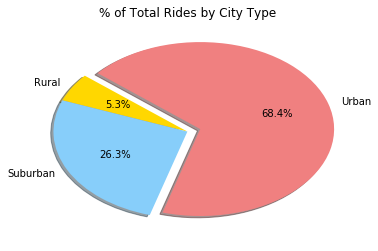

In [144]:
#Create a pie chart - % of total rides by city type

#Get the count of ids of the 'grouped by city' data
total_rides = grouped_rides["ride_id"].count()

#Store the total rides by city into a dataframe and reset index to prep for a merge with city data
total_rides_city_df = pd.DataFrame({"Total Rides": total_rides}).reset_index()

#Merge the total_rides_df and the city_data to bring in the city types
total_rides_merge = pd.merge(total_rides_city_df, city_data, on="city")

#Merge will generate duplicates in City column. Drop them.
total_rides_merge = total_rides_merge.drop_duplicates(subset=["city"])

total_rides_merge
#Group the new dataframe by type
grouped_type = total_rides_merge.groupby("type")

#Get the sum of the total rides of the 'grouped by city type' data
rides_by_city_type = grouped_type["Total Rides"].sum()


#Store the total rides by city type into a new dataframe
total_rides_city_type = pd.DataFrame({"Total Rides": rides_by_city_type}).reset_index()
total_rides_city_type

#Define the attritbutes for the pie parameters
explode = (0,0,0.1)
colors = ["gold", "lightskyblue", "lightcoral"]

plt.pie(total_rides_city_type["Total Rides"].values, explode=explode, labels=total_rides_city_type["type"].values, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")



Text(0.5,1,'% of Total Drivers by City Type')

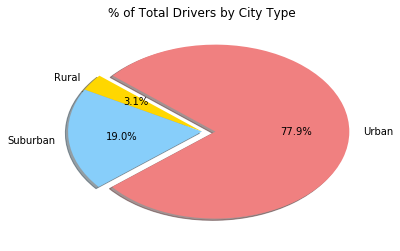

In [145]:
#Create a pie chart - % of total drivers by city type


#Get the sum of the total drivers of the 'grouped by city type' data
drivers_by_city_type = grouped_type["driver_count"].sum()

#Store the total drivers by city type into a new dataframe
total_drivers_city_type = pd.DataFrame({"Total drivers": drivers_by_city_type}).reset_index()
total_drivers_city_type

#Define the attritbutes for the pie parameters
explode = (0,0,0.1)
colors = ["gold", "lightskyblue", "lightcoral"]

plt.pie(total_drivers_city_type["Total drivers"].values, explode=explode, labels=total_drivers_city_type["type"].values, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")

3 Observable Trends:

1. People living in urban cities are more likely to take Pyber and their average fare is lower than suburban and rural areas.
2. There are more drivers in the urban cities most likely due to demand for pyber services in urban areas.
3. Rides in rural areas have a much higher fare due to the fact that there is less demand for those services. 